<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет! Спасибо, что прислал задание:) Меня зовут Слепцов Артем и я буду проверять твой проект) Ты проделал большую работу над проектом, однако его еще можно улучшить. Будет здорово, если ты, надеюсь, не против, если я буду на ты, будешь отвечать на комментарии и участвовать в диалоге. 

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно. Рекомендации укажу таким же цветом; <font color=orange>оранжевый</font> - некритичные замечания. Если таких замечаний меньше трех - проект может быть принят без их отработки; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 
</div>

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (от 0 до 100)
- User_Score — оценка пользователей (от 0 до 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Цель работы также хорошо бы вынести в отдельный блок вступления. Еще лучше будет, если ты сделаешь план работы с гиперссылками. Да, есть плагин ToC. Но хорошо бы уметь реализовывать интерактивный план проекта вручную. Как это реализовать - смотри по [ссылке](https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook/49717704).

</div>

# Шаг 1. Откроем файлы, импортируем библиотеки

Импорт библиотек

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Я заметил, что ячейки в твоей тетрадке начинаются не с 1. Перед отправкой работы рекомендую перезапускать ноутбук, чтобы убедиться, что все ячейки выполняются корректно.

</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение. 

</div>

Прочитаем файл games.csv и сохраним его в переменной df.

In [2]:
games = pd.read_csv('/datasets/games.csv')

Получение первых 5 строк.

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Общая информация о данных таблицы df.

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Подумай также о возможных причинах появления пропусков, а также о том, являются ли они случайными или нет. Можно высказать предварительные варианты их обработки. 

Первый взгляд на таблицу выполнен. Не забывай делать выводы по каждомц пункту анализа. 

</div>

# Шаг 2. Подготовка данных

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Поясните, как обработать это значение.
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Получаем перечень названий столбцов.

In [5]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Заменим названия столбцов приведя их к нижнему регистру.

In [6]:
games.set_axis(['name',
             'platform',
             'year_of_release',
             'genre',
             'na_sales',
             'eu_sales',
             'jp_sales',
             'other_sales',
             'critic_score',
             'user_score',
             'rating'],axis = 'columns', inplace = True)
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Не надо переименовывать столбцы через атрибут columns, потому что так ты неявно учитываешь порядок столбцов. Если порядок столбцов поменяется, код перестанет работать. Используй вместо этого метод rename().
    
</div>

Преобразование данных в нужные типы.

In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных пользовательских оценках присутствует tbd, что мешает переводу данных в float64, произведем расчёт количества tbd в столбце user_score.

In [8]:
games[games['user_score'] == 'tbd']['user_score'].count()

2424

Аббревиатура tbd значит to be determined, to be done. Произведем замену tbd на Nan.

In [9]:
games.loc[games['user_score'] == 'tbd','user_score'] = np.nan

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Верно, по своей сути tbd и является Nan. Отлично, что определяешь неявные пропущенные значения.

</div>

Выполним преобразование.

In [10]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['user_score'] = games['user_score'].astype('float64')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Данные об оценках взяты с сайта metacritic, так как оценки пользователей в 10 бальной системе, а оценки критиков в 100 бальной системе. Для удобства переведем оценки пользователей в 100 бальную систему исчисления, умножив их на 10.

In [11]:
games['user_score'] = games['user_score'] * 10

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [12]:
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Заменяем пропущенные значения в столбцах с названием игры и жанра на строку 'unknown'

In [13]:
games['name'] = games['name'].fillna('unknown')
games['genre'] = games['genre'].fillna('unknown')

Установим наличие дубликатов.

In [14]:
games.duplicated().sum()

0

Посчитаем суммарные продажи во всех регионах.

In [15]:
games['total_sales'] = games['na_sales'] + games['jp_sales'] + games['eu_sales']

In [16]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Да, восстановить пропущенные значения мы не можем. Данных для этого недостаточно. Лучше работать с меньшим количеством данных хорошего качества.
    
Ошибки в данных устранены. Данные подготовлены к дальнейшему анализу. 

</div>

# Шаг 3. Проведем исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. Найдите популярные в прошлом платформы, у которых сейчас продажи на нуле. За какой характерный период появляются новые и исчезают старые платформы?
- Определите, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году.
- Далее работайте только с данными, которые вы определили. Не учитывайте данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы и соотнесите их с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Text(0, 0.5, 'Количество')

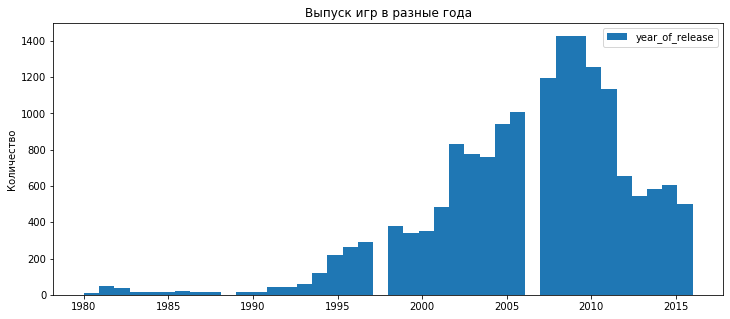

In [17]:
games_on_years = games[games['year_of_release'] != np.NaN]['year_of_release'].plot(kind='hist', bins=40, figsize=(12,5)).legend()
plt.title("Выпуск игр в разные года")
plt.ylabel("Количество")

Вывод:
- Пик приходиться на 2008 год, после того как массово начали создавать мобильные приложения и мобильные игры, виден резкий спад консольных игр.
- Из полученного графика видно, что количество выпускаемых игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. 


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Соглашусь с озвученной причиной спада в индустрии последнего времени.  

</div>

Text(0, 0.5, 'Количество продаж')

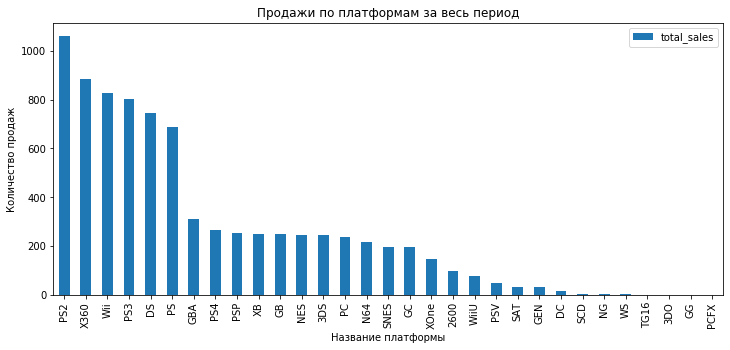

In [18]:
platform_on_sales = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform_on_sales.plot(kind='bar', figsize=(12,5))
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Вывод:
   - Самыми популярными игровыми консолями являются PS2, X360, Wii, PS3, DS, PS

Топ 5 игровых платформ выглядит следующим образом.

In [19]:
top_5 = platform_on_sales.head()
top_5

,total_sales
platform,
PS2,1062.33
X360,885.66
Wii,828.44
PS3,803.97
DS,746.86


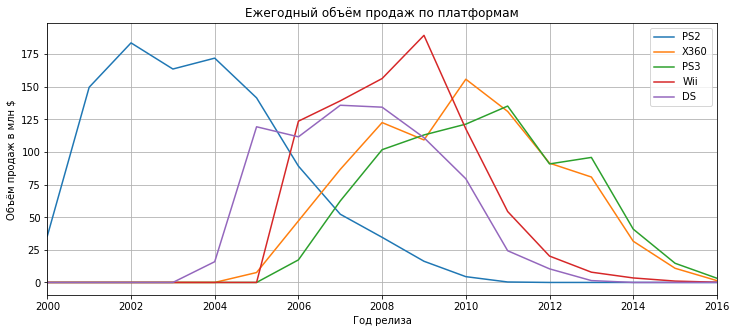

In [20]:
# Формирую 5 df для каждой платформы с помощью метода .query (Объём продаж под каждую платформу в каждый год)
PS2 = games.query('platform =="PS2"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
X360 = games.query('platform =="X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
PS3 = games.query('platform =="PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
Wii = games.query('platform =="Wii"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
DS = games.query('platform =="DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

# Создаю сводную таблицу, где для каждой платформы указан ежегодный объём продаж
top5_data = (
    PS2.merge(X360, how='outer', on='year_of_release')
    .merge(PS3, how='outer', on='year_of_release')
    .merge(Wii, how='outer', on='year_of_release')
    .merge(DS, how='outer', on='year_of_release')
)
# Переименовываю легенды
top5_data.set_axis(['PS2', 'X360', 'PS3', 'Wii', 'DS'], axis = 'columns', inplace = True)
top5_data = top5_data.query('year_of_release >= 1995').fillna(0)

# Рисую гистограмму для визуального анализа полученных результатов
top5_data.plot(figsize=(12, 5), title='Ежегодный объём продаж по платформам', grid=True).set(xlabel='Год релиза', ylabel='Объём продаж в млн $')
plt.show()

Вывод:

- Cамые продаваемые игровые платформы это Sony Play Station и XBOX, Wii.
- Практически все игровые платформы в среднем существуют по 10 лет.
- Самый пик наступает примерно через 5 лет после выхода приставки.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Значение средней продолжительности существования платформы приведено. Однако выводы ты делаешь по графику. Стоит также привести расчет данного значения. Подумай, стоит ли включать в расчет все платформы. Будут ли выбросы по продолжительности существования платформ?

</div>

C 2010 года  начинаеться резкий спад продаж по платформам.Найдем потенциально прибыльные платформы. В 2013 году были преставлены новые поколения консолей, посмотрим как изменились продажи. Отфильтуем таблицу и подсчитаем количество продаж за 2013 по 2016 годы для каждой из платформ.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Актуальный период назван. Так в рассмотрение попадут только последние поколения платформ, а также будем рассматривать только конечный на данный момент интервал развития игровой индустрии. 

</div>

In [21]:
filt_games = games.query('year_of_release >= 2013')
filt_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,17.09
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,14.86
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,13.82
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,10.65


Наиболее прибыльной игрой данного периода является Grand Theft Auto V

Text(0, 0.5, 'Количество продаж')

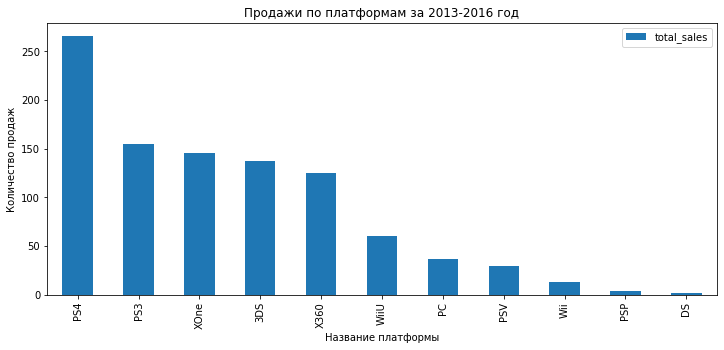

In [22]:
platform_on_sales_filt = filt_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform_on_sales_filt.plot(kind='bar', figsize=(12,5))
plt.title("Продажи по платформам за 2013-2016 год")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

In [23]:
top_5_filt = platform_on_sales_filt.head()
top_5_filt

,total_sales
platform,
PS4,265.79
PS3,154.66
XOne,145.05
3DS,136.97
X360,124.69


Отфильтрую таблицу и оставлю только строки с топ-5 прибыльными платформами (PS4, PS3, X360, 3DS, XOne)

In [24]:
filt_games = filt_games.query('platform == "PS4" or platform == "PS3" or platform == "X360" or platform == "3DS" or platform == "XOne"')

В топ 5 платформ по продажам за периуд 2013-2016 вошли PS4, PS3, XOne, 3DS, X360.
Найдем ежегодный объем продаж для каждой из платформ.

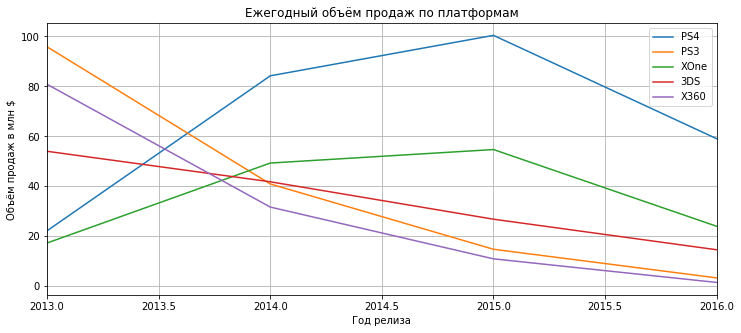

In [25]:
# Формирую 5 df для каждой платформы с помощью метода .query (Объём продаж под каждую платформу в каждый год)
PS4 = filt_games.query('platform =="PS4"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
PS3 = filt_games.query('platform =="PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
XOne = filt_games.query('platform =="XOne"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
n_3DS = filt_games.query('platform =="3DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
X360 = filt_games.query('platform =="X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

# Создаю сводную таблицу, где для каждой платформы указан ежегодный объём продаж
top5_data = (
    PS4.merge(PS3, how='outer', on='year_of_release')
    .merge(XOne, how='outer', on='year_of_release')
    .merge(n_3DS, how='outer', on='year_of_release')
    .merge(X360, how='outer', on='year_of_release')
)
# Переименовываю легенды
top5_data.set_axis(['PS4', 'PS3', 'XOne', '3DS', 'X360'], axis = 'columns', inplace = True)
top5_data = top5_data.query('year_of_release >= 2013').fillna(0)

# Рисую гистограмму для визуального анализа полученных результатов
top5_data.plot(figsize=(12, 5), title='Ежегодный объём продаж по платформам', grid=True).set(xlabel='Год релиза', ylabel='Объём продаж в млн $')
plt.show()

Вывод:
   - Потенциально прибыльными платформами являются PS4 и XOne.
   - Прибыль от PS3, X360 падает.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Да, именно эти платформы мы и можем назвать перспективными на 2017 год. 

</div>

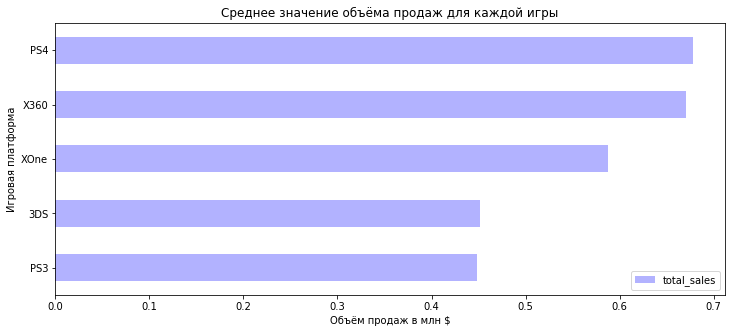

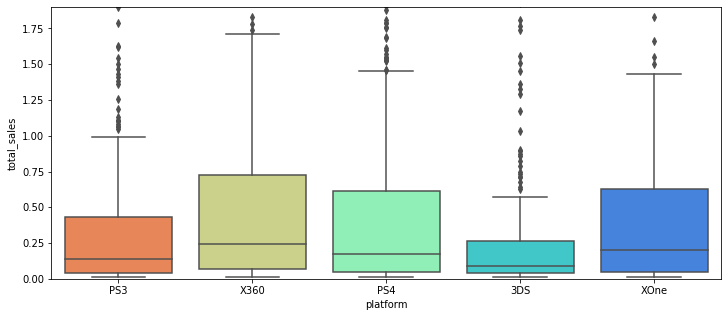

In [26]:
(
    filt_games.pivot_table(index="platform", values="total_sales", aggfunc="mean").sort_values('total_sales')
    .plot(kind="barh", title="Среднее значение объёма продаж для каждой игры", color='blue', alpha=0.3, figsize=(12, 5))
    .set(ylabel='Игровая платформа', xlabel='Объём продаж в млн $')
)
plt.show()

plt.rcParams['figure.figsize']=(12, 5)
ax = sns.boxplot(x='platform', y='total_sales', data=filt_games , palette='rainbow_r')
ax.set_ylim(0, 1.9)
plt.show()

Вывод: 
- Исходя из графиков видно, что медиана протекает у всех по разному.
- Платформа 3DS показывает самые низкие результаты: от 0.10 млн. долларов до 29 млн. долларов. Данные диапазоны указывают на то, в каком размахе располагается основная масса значений характеризующих суммарный объём продаж для каждой игры.
- средние значения объёма продаж для каждой игры с разбивкой по платформам, то самые высокие показатели у X360 и PS4, это говорит о том, что в среднем игры под эти платформы составляют наибольшие продажи, чем игры для XOne, PS3 и тем более 3DS.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>
 
Подумай, из-за чего формируется разница между платформами. 

</div>

Выполним анализ продаж игравой консоли PS4, проанализируем отзывы пользователей и критиков.Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [27]:
PS4 = filt_games[filt_games['platform']=='PS4']

Построим гистограмму рассеяния оценок пользователей, и критиков.

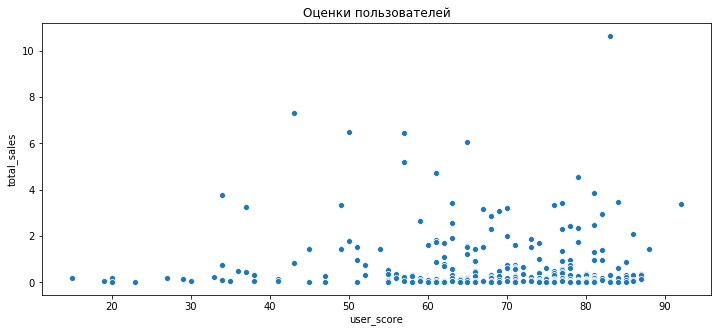

Коэффициент корреляции Отзывы Пользователей/Продажи: -0.031
Среднее значение Оценки пользователей: 67.48


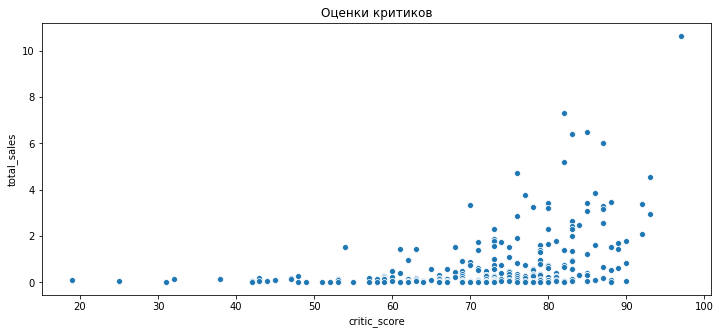

Коэффициент корреляции Отзывы Пользователей/Продажи: 0.406
Среднее значение Оценки пользователей: 72.09


In [28]:
# Оценки пользователей
plt.figure(figsize=(12,5))
sns.scatterplot(x='user_score', y='total_sales', data=PS4)
plt.title('Оценки пользователей')
plt.show()
print('Коэффициент корреляции Отзывы Пользователей/Продажи: {:.3f}'.format(PS4['user_score'].corr(PS4['total_sales'])))
print('Среднее значение Оценки пользователей: {:.2f}'.format(PS4['user_score'].mean())) 
# Оценки критиков
plt.figure(figsize=(12,5))
sns.scatterplot(x='critic_score', y='total_sales', data=PS4)
plt.title('Оценки критиков')
plt.show()
print('Коэффициент корреляции Отзывы Пользователей/Продажи: {:.3f}'.format(PS4['critic_score'].corr(PS4['total_sales'])))
print('Среднее значение Оценки пользователей: {:.2f}'.format(PS4['critic_score'].mean())) 

Вывод:

- Средняя оценка критиков составляет 72 баллов, большинство оценок находиться в диапазоне 70 - 87 баллов. Есть зависимость между Отзывами Критиков и Продажами игр для платформы PS4, так как коэффициент корреляции равен 0.406 ,то есть наблюдается зависимость между положительными отзывами и увеличением объёма продаж игр. К
- Средняя оценка пользователей составляет 67 баллов, большинство оценок находиться в диапазоне 45 - 80 баллов. Отсутствует зависимость между Отзывами пользователей и Продажами игр для платформы PS4, так как коэффициент корреляции равен -0.031.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Результат получен. Подумай, чем он вызван. Стоит проанализировать и другие платформы. Делать выводы лишь по одной из них мы не можем. 

</div>

Сформируем сводную таблицу по выручке и жанрам, по полученным данным построим круговую диаграмму, для выявления самого прибыльного жанра.

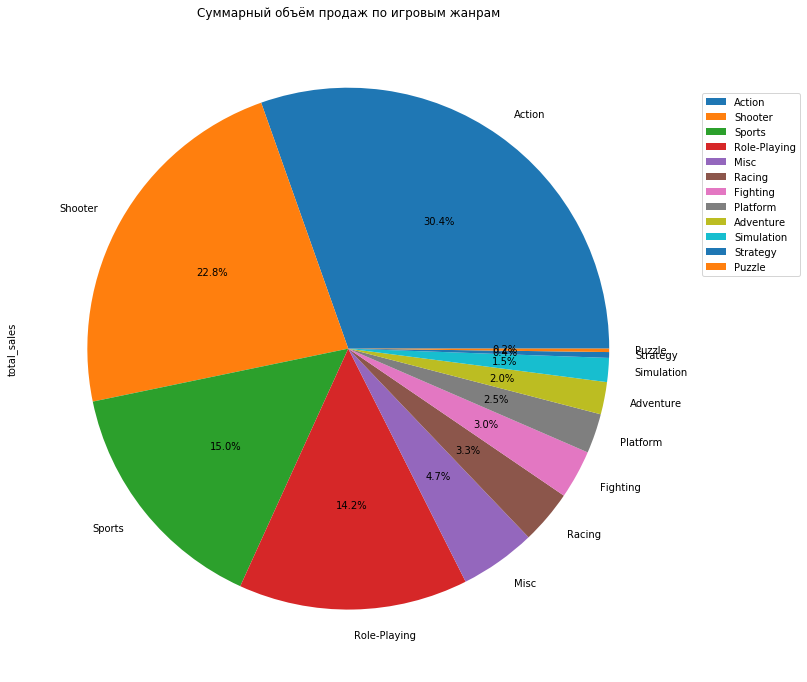

,genre,total_sales
0,Action,251.6
1,Shooter,188.9
2,Sports,123.7


In [29]:
(
    filt_games
    .pivot_table(index="genre", values="total_sales", aggfunc="sum")
    .sort_values('total_sales', ascending = False)
    .plot(y="total_sales", kind="pie", figsize=(12, 12), autopct='%1.1f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9))
plt.title('Суммарный объём продаж по игровым жанрам') 
plt.show()
# Топ 3 самых прибыльных жанра 
filt_games.pivot_table(index="genre", values="total_sales", aggfunc="sum").sort_values('total_sales', ascending = False).reset_index().head(3)

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>
 
Не советую использовать пироговые диаграммы (pie-charts). Такая диаграмма затрудняет понимание, особенно если сегментов будет больше 4х. Также, на этом типе диаграмм сложно визуально увидеть разницу между сегментами. Рекомендую использовать обычные столбчатые диаграммы вместо пироговых диаграмм. 

</div>

Вывод:

Самыми прибыльными игровыми жанрами являются:
- Action - 31.7% от общей доли рынка, с прибылью 378.5 млн. долларов.
- Shooter - 23.6% от общей доли рынка, с прибылью 282.1 млн. долларов.
- Sports - 14% от общей доли рынка, с прибылью 167.8 млн. долларов

Самыми наименее прибыльными являются жанры:

- Puzzle - 0.2% от общей доли рынка
- Strategy - 0.4% от общей доли рынка
- Adventure - 1.9% от общей доли рынка

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Анализ популярности жанров проведен. Однако не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 

</div>

# Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Произведем анализ региона NA. Для данного региона составим сводную таблицу и выявим топ 5 популярный платформ. Возьмем данные за период 2013-2016 года.

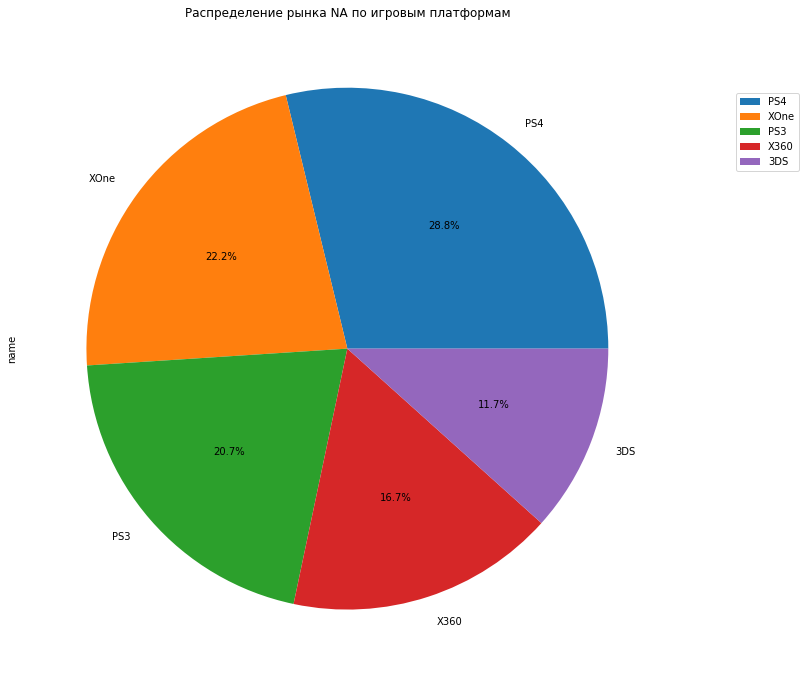

In [30]:
data_na = filt_games.query('na_sales > 0')
(
    data_na
    .pivot_table(index="platform", values="name", aggfunc="count")
    .sort_values('name', ascending=False)
    .plot(y="name", kind="pie", figsize=(12,12), autopct='%1.1f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9))
plt.title('Распределение рынка NA по игровым платформам') 
plt.show()

Выявим топ 5 популярных игровых жанров в данном регионе.

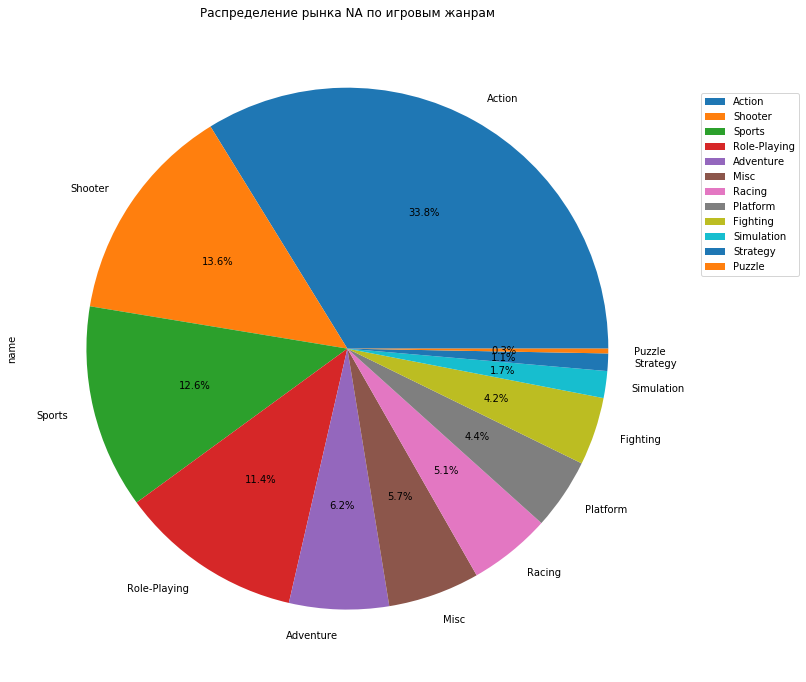

In [31]:
data_na_genre = filt_games.query('na_sales > 0')
(
    data_na
    .pivot_table(index="genre", values="name", aggfunc="count")
    .sort_values('name', ascending=False)
    .plot(y="name", kind="pie", figsize=(12,12), autopct='%1.1f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9))
plt.title('Распределение рынка NA по игровым жанрам') 
plt.show()

Топ 5 жаноров данного региона:
 - Action 33.8% от общей доли рынка NA.
 - Shooter 13.6% от общей доли рынка NA.
 - Sports 12.6% от общей доли рынка NA.
 - Role-Playing 11.4% от общей доли рынка NA.
 - Adventure 6.2% от общей доли рынка NA.

Для оценки влияния рейтинга ESRB на продажи игр в регионе NA сформируем сводную таблицу по столбцам rating и total_sales.

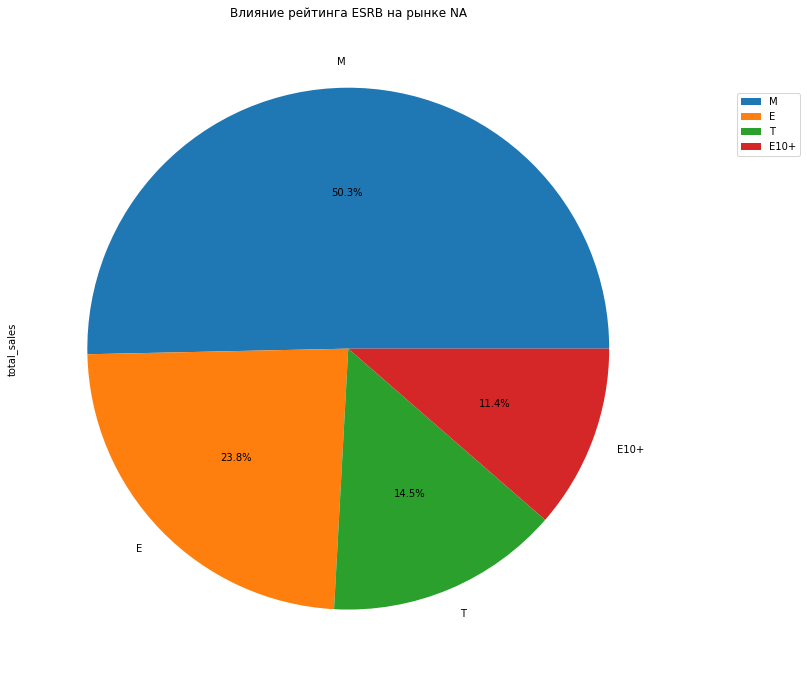

In [32]:
(
    data_na
    .pivot_table(index="rating", values="total_sales", aggfunc="sum")
    .sort_values('total_sales', ascending=False)
    .plot(y="total_sales", kind="pie", figsize=(12, 12), autopct='%1.1f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9))
plt.title('Влияние рейтинга ESRB на рынке NA') 
plt.show()

Можно сделать вывод, что оценка рейтинга ESRB влияет на объём продаж игр в данном регионе, таким образом игры с оценкой "M" составили наибольший суммарный объём продаж в данном регионе, а игры с рейтингом "T" и "E10+" имеют самую маленькую долю продаж в регионе.

Вывод:
   - Самыми популярными игровыми консолями являются PS4, XOne.
   - Консоли PS3, X360 и 3DS теряют свою популярность на фоне новых приставок.
   - Самым популярным игровым жанорм являеться Action 33.8% от общей доли рынка NA.
   - Ровно половину от продаж являются игры с рейтингом М

Произведем анализ региона EU. Для данного региона составим сводную таблицу и выявим топ 5 популярный платформ. Возьмем данные за период 2013-2016 года.

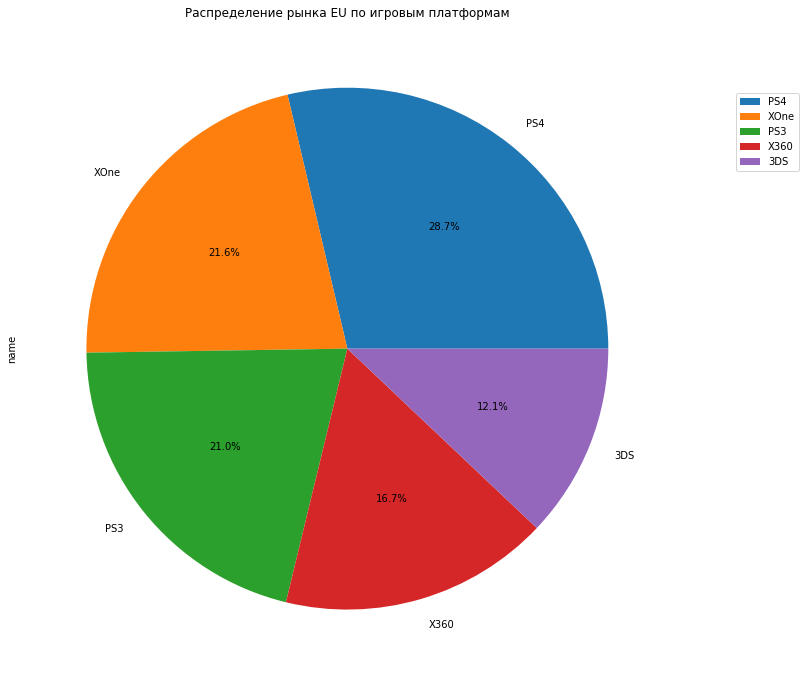

In [33]:
data_eu = filt_games.query('eu_sales > 0')
(
    data_eu
    .pivot_table(index="platform", values="name", aggfunc="count")
    .sort_values('name', ascending=False)
    .plot(y="name", kind="pie", figsize=(12,12), autopct='%1.1f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9))
plt.title('Распределение рынка EU по игровым платформам') 
plt.show()

Выявим топ 5 популярных игровых жанров в данном регионе.

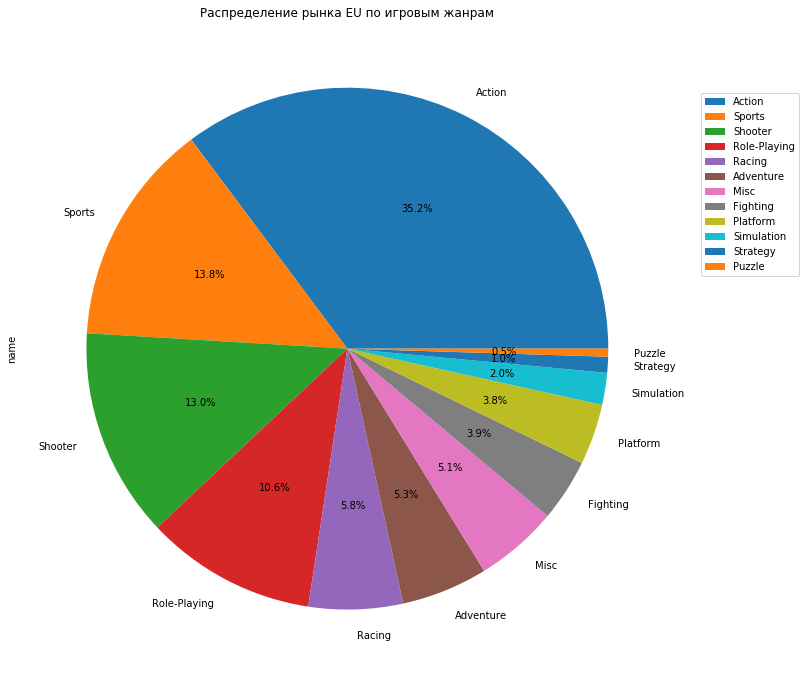

In [34]:
data_eu_genre = filt_games.query('eu_sales > 0')
(
    data_eu
    .pivot_table(index="genre", values="name", aggfunc="count")
    .sort_values('name', ascending=False)
    .plot(y="name", kind="pie", figsize=(12,12), autopct='%1.1f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9))
plt.title('Распределение рынка EU по игровым жанрам') 
plt.show()

Топ 5 жаноров данного региона:
 - Action 35.2% от общей доли рынка EU.
 - Sports 13.8% от общей доли рынка EU.
 - Shooter 13.0% от общей доли рынка EU.
 - Role-Playing 10.6% от общей доли рынка EU.
 - Racing 5.8% от общей доли рынка EU.

Для оценки влияния рейтинга ESRB на продажи игр в регионе EU сформируем сводную таблицу по столбцам rating и total_sales.

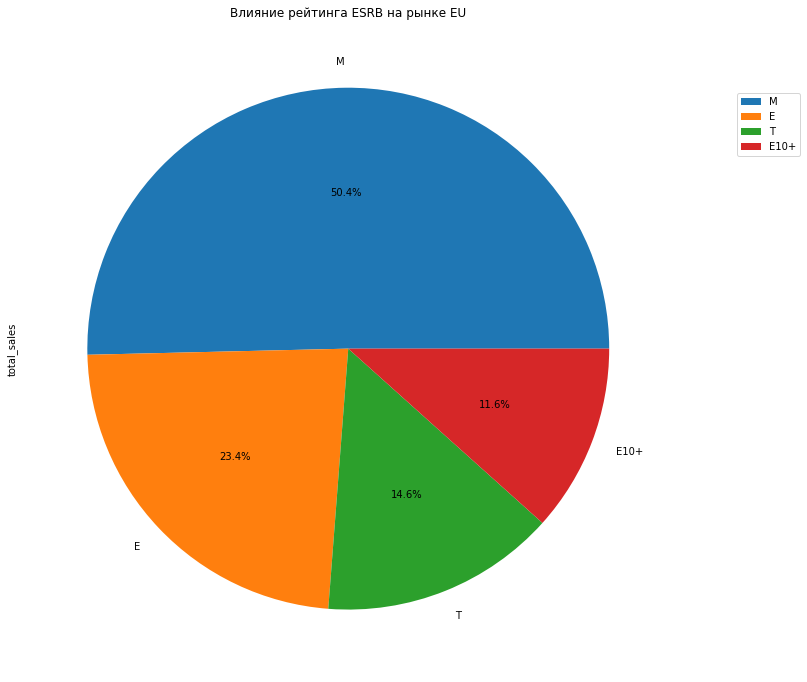

In [35]:
(
    data_eu
    .pivot_table(index="rating", values="total_sales", aggfunc="sum")
    .sort_values('total_sales', ascending=False)
    .plot(y="total_sales", kind="pie", figsize=(12, 12), autopct='%1.1f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9))
plt.title('Влияние рейтинга ESRB на рынке EU') 
plt.show()

Вывод:
 - Самыми популярными игровыми консолями являются PS4, XOne.
 - Консоли PS3, X360 и 3DS теряют свою популярность на фоне новых приставок.
 - Самым популярным игровым жанорм являеться Action 35.2% от общей доли рынка EU.
 - Ровно половину от продаж являются игры с рейтингом М

Произведем анализ региона JP. Для данного региона составим сводную таблицу и выявим топ 5 популярный платформ. Возьмем данные за период 2013-2016 года.

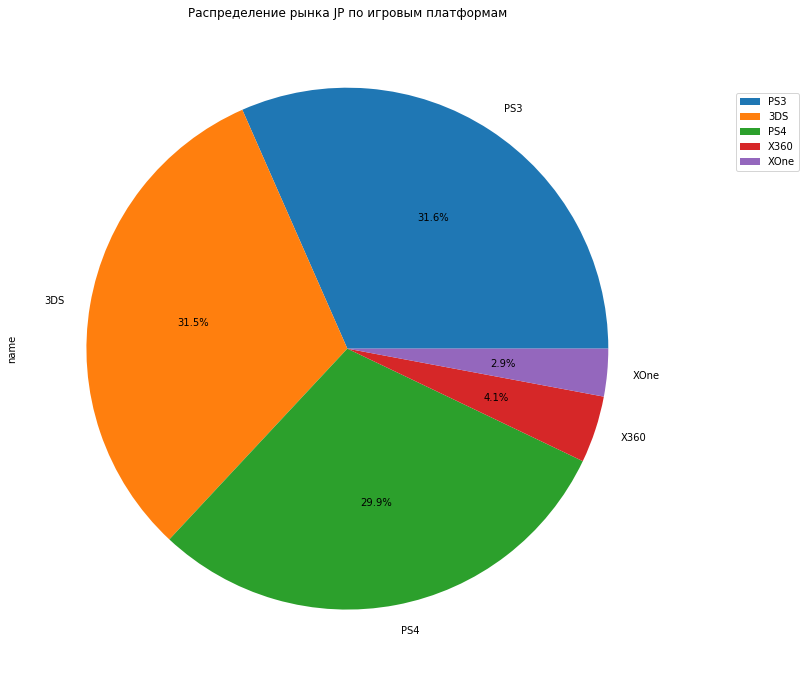

In [36]:
data_jp = filt_games.query('jp_sales > 0')
(
    data_jp
    .pivot_table(index="platform", values="name", aggfunc="count")
    .sort_values('name', ascending=False)
    .plot(y="name", kind="pie", figsize=(12,12), autopct='%1.1f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9))
plt.title('Распределение рынка JP по игровым платформам') 
plt.show()

Выявим топ 5 популярных игровых жанров в данном регионе.

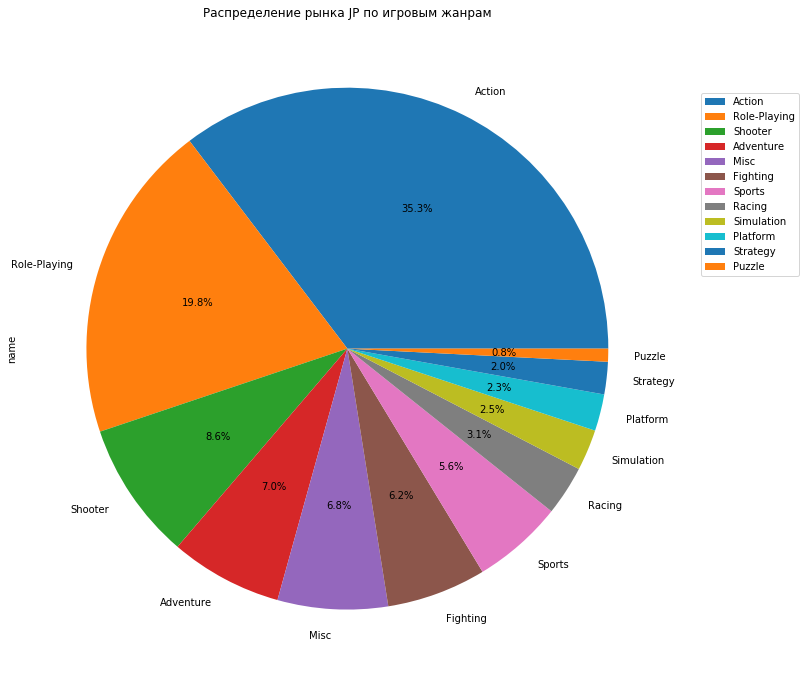

In [37]:
data_jp_genre = filt_games.query('jp_sales > 0')
(
    data_jp
    .pivot_table(index="genre", values="name", aggfunc="count")
    .sort_values('name', ascending=False)
    .plot(y="name", kind="pie", figsize=(12,12), autopct='%1.1f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9))
plt.title('Распределение рынка JP по игровым жанрам') 
plt.show()

Топ 5 жаноров данного региона:
 - Action 35.3% от общей доли рынка JP.
 - Role-Playing 19.8% от общей доли рынка JP.
 - Shooter 8.6% от общей доли рынка JP.
 - Adventure 7.0% от общей доли рынка JP.
 - Misc 6.8% от общей доли рынка JP.

Для оценки влияния рейтинга ESRB на продажи игр в регионе JP сформируем сводную таблицу по столбцам rating и total_sales.

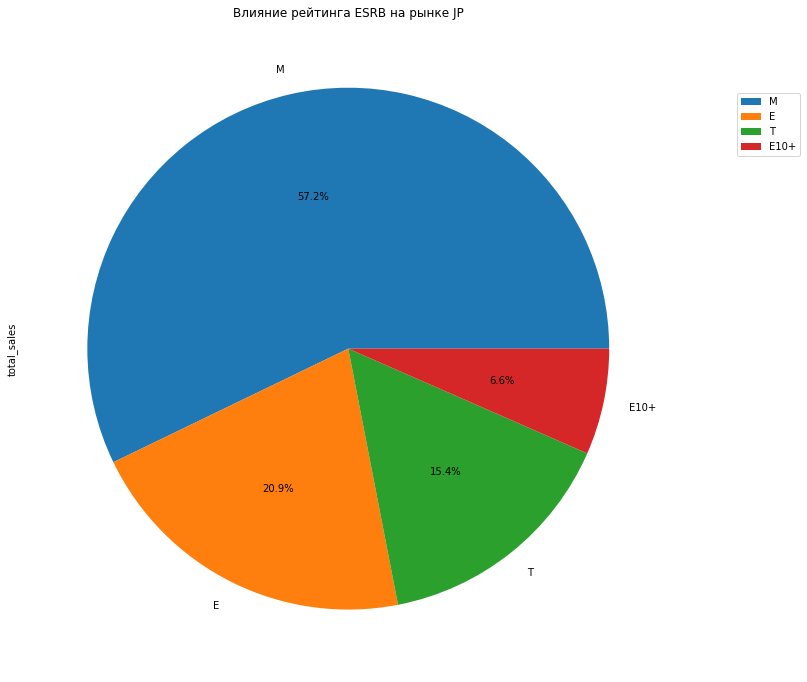

In [38]:
(
    data_jp
    .pivot_table(index="rating", values="total_sales", aggfunc="sum")
    .sort_values('total_sales', ascending=False)
    .plot(y="total_sales", kind="pie", figsize=(12, 12), autopct='%1.1f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9))
plt.title('Влияние рейтинга ESRB на рынке JP') 
plt.show()

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Обрати внимание - ты не учитываешь игры без рейтинга. В результате огромная часть игр просто выпадает из анализа. Найди способ учесть их при группировке значений по рейтингу.
    
</div>

Вывод:

- Самыми популярными игровыми консолями являются PS3, 3DS.
- Консоль X360 и XOne не так популярна в данном регионе как в EU и NA.
- На данном рынке имеет большую популярность консоль 3DS.
- Самым популярным игровым жанорм являеться Action 35.3% от общей доли рынка JP.
- Более половины от продаж являются игры с рейтингом М

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Портрет типичного пользователя каждого из регионов получен. Приведены все необходимые графики. Здорово, что отмечены индивидуальные особенности каждого региона. 

</div>

# Шаг 5. Проведите исследование статистических показателей

- Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения

Составим массив с игровыми жанрами.

In [39]:
game_genres = games['genre'].unique()
game_genres = game_genres[:-1]
game_genres

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Посчитаем дисперсию, стандартное отклонение, среднее и медиану у разных жанров к оценкам пользователей.

In [40]:
for genre in game_genres:
    print('Дисперсия', genre.upper(),':', np.var(games[games['genre']==genre]['user_score']))
    print('Стандартное отклонение', genre.upper(),':', np.std(games[games['genre']==genre]['user_score']))
    print('Среднее',genre.upper(),':',  games[games['genre']==genre]['user_score'].mean())
    print('Медиана',genre.upper(),':',  games[games['genre']==genre]['user_score'].median())
    print('\n')
    

Дисперсия SPORTS : 259.41606711770174
Стандартное отклонение SPORTS : 16.10639832854328
Среднее SPORTS : 69.61196736174071
Медиана SPORTS : 74.0


Дисперсия PLATFORM : 228.56989693423003
Стандартное отклонение PLATFORM : 15.118528266145155
Среднее PLATFORM : 73.01401869158879
Медиана PLATFORM : 77.0


Дисперсия RACING : 238.79568050116703
Стандартное отклонение RACING : 15.453015255967589
Среднее RACING : 70.3619344773791
Медиана RACING : 74.0


Дисперсия ROLE-PLAYING : 118.36433722368848
Стандартное отклонение ROLE-PLAYING : 10.879537546407406
Среднее ROLE-PLAYING : 76.19515477792733
Медиана ROLE-PLAYING : 78.0


Дисперсия PUZZLE : 229.15625
Стандартное отклонение PUZZLE : 15.137907715401095
Среднее PUZZLE : 71.75
Медиана PUZZLE : 75.0


Дисперсия MISC : 238.8395037385651
Стандартное отклонение MISC : 15.454433141935848
Среднее MISC : 68.19362186788155
Медиана MISC : 71.0


Дисперсия SHOOTER : 230.2087795862147
Стандартное отклонение SHOOTER : 15.172632585883528
Среднее SHOOTER : 70.4

Посчитаем дисперсию, стандартное отклонение, среднее и медиану у разных жанров к оценкам критиков.

In [41]:
for genre in game_genres:
    print('Дисперсия', genre.upper(),':', np.var(games[games['genre']==genre]['critic_score']))
    print('Стандартное отклонение', genre.upper(),':', np.std(games[games['genre']==genre]['critic_score']))
    print('Среднее',genre.upper(),':',  games[games['genre']==genre]['critic_score'].mean())
    print('Медиана',genre.upper(),':',  games[games['genre']==genre]['critic_score'].median())
    print('\n')

Дисперсия SPORTS : 192.44957338338818
Стандартное отклонение SPORTS : 13.872619557365082
Среднее SPORTS : 71.96817420435511
Медиана SPORTS : 75.0


Дисперсия PLATFORM : 174.2521284649547
Стандартное отклонение PLATFORM : 13.200459403556934
Среднее PLATFORM : 68.05835010060362
Медиана PLATFORM : 69.0


Дисперсия RACING : 202.738568086544
Стандартное отклонение RACING : 14.238629431463691
Среднее RACING : 67.96361185983828
Медиана RACING : 69.0


Дисперсия ROLE-PLAYING : 143.80064768055612
Стандартное отклонение ROLE-PLAYING : 11.991690776556746
Среднее ROLE-PLAYING : 72.65264586160109
Медиана ROLE-PLAYING : 74.0


Дисперсия PUZZLE : 161.46745455994895
Стандартное отклонение PUZZLE : 12.706984479409304
Среднее PUZZLE : 67.42410714285714
Медиана PUZZLE : 70.0


Дисперсия MISC : 199.9144953551543
Стандартное отклонение MISC : 14.139112254846635
Среднее MISC : 66.61950286806884
Медиана MISC : 69.0


Дисперсия SHOOTER : 211.55299191144783
Стандартное отклонение SHOOTER : 14.544861357587697
С

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Будет здорово, если все стат. показатели ты соберешь в единую таблицу. Так нам будет проще сравнивать различные жанры между собой. 

</div>

Напишем функцию для отрисовки гистограм.

In [42]:
def genre_hist(genre):
    fig, axes = plt.subplots()
    data = games[games['genre'] == genre]
    user_score = data['user_score']
    critic_score = data['critic_score']
    colors = ['black', 'r']

    plt.hist([user_score, critic_score], color = colors, alpha=.9, label = ['user_score', 'critic_score'])
    plt.legend()
    plt.title(genre)

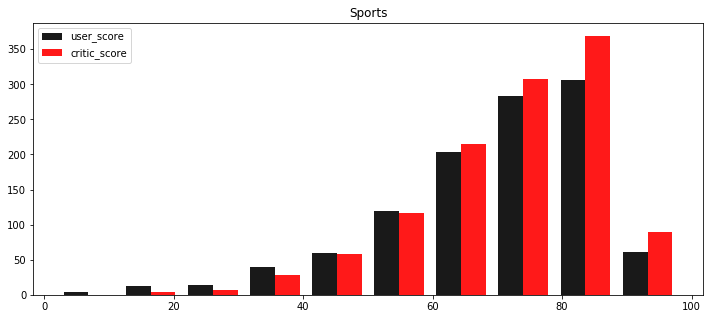

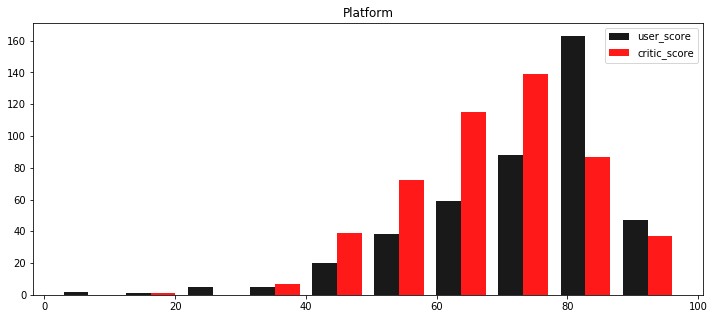

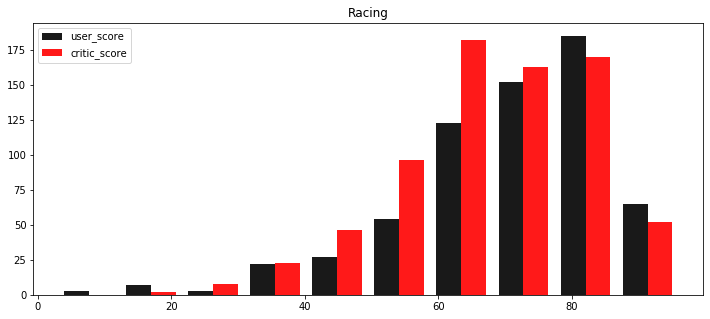

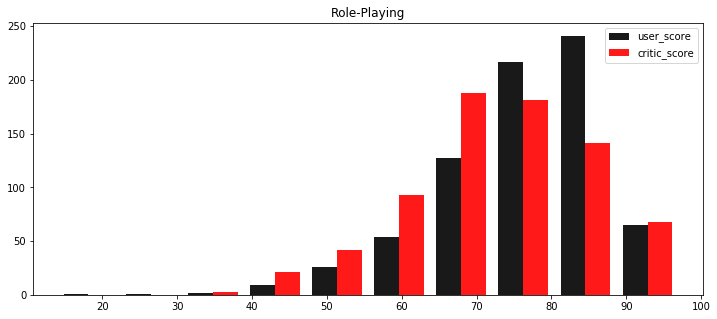

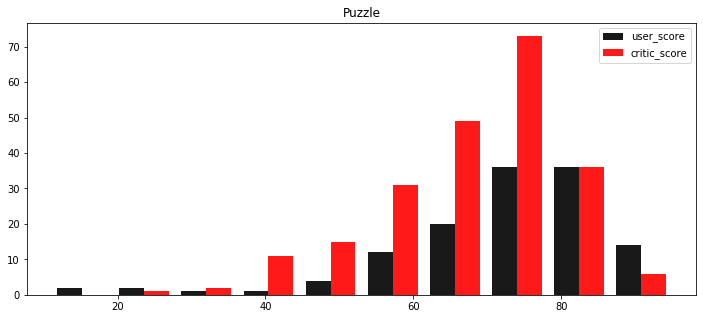

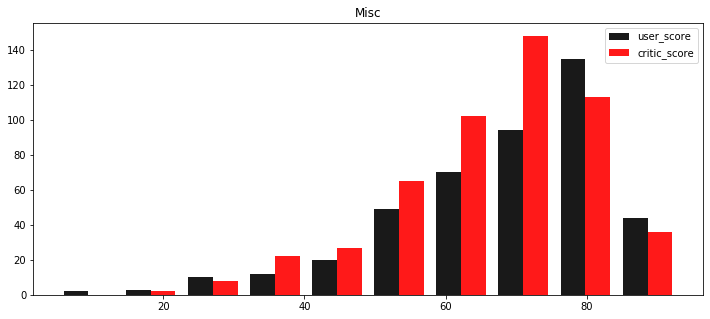

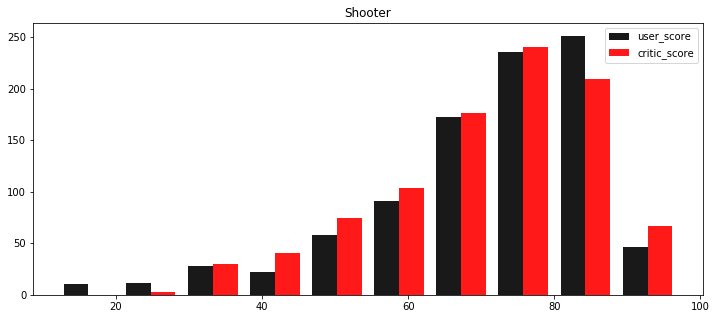

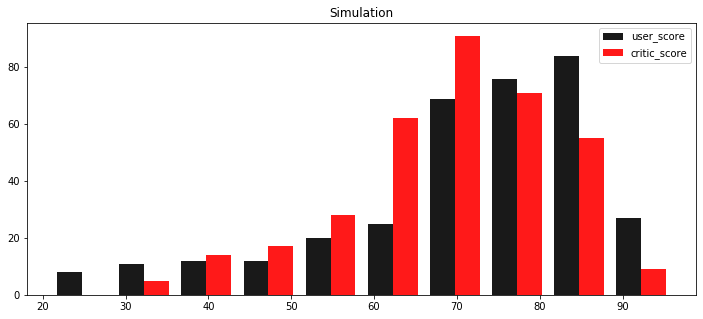

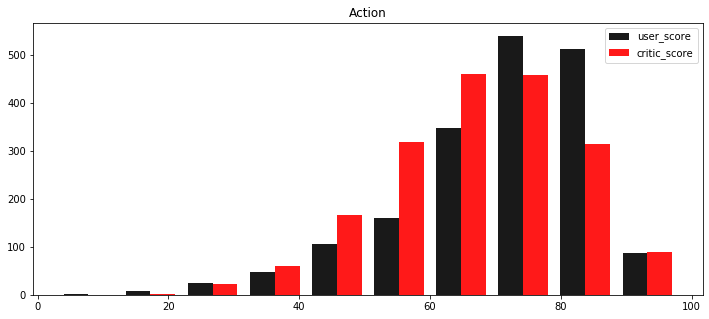

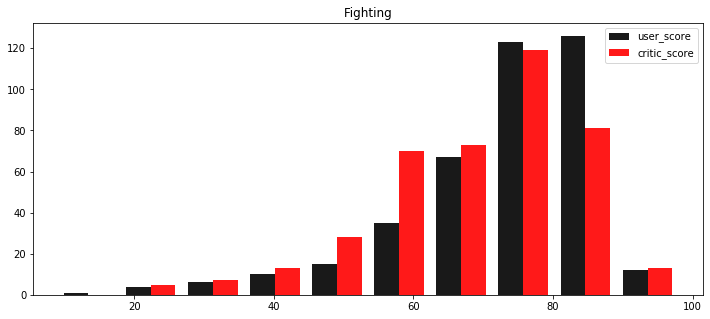

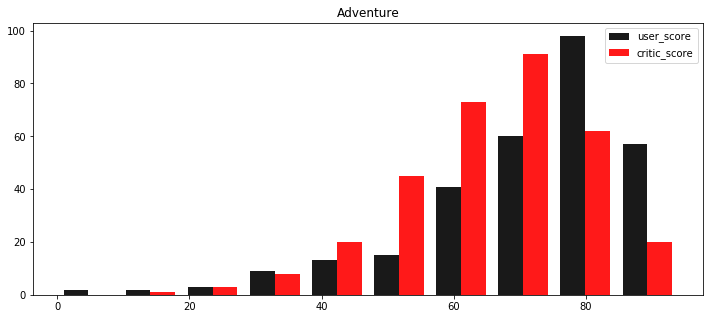

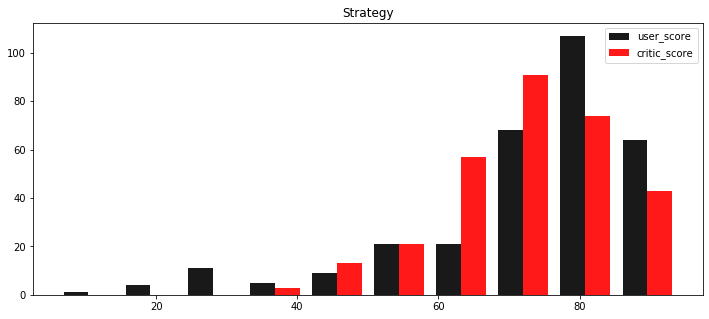

In [43]:
for genre in game_genres:
    genre_hist(genre)

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Анализ проведен. Очень не хватает выводов по проведенному анализу. Сделай по нему необходимые комментарии. 

</div>

# Шаг 6. Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

Для проверки данной гипотезы, необходимо воспользоваться методом проверки гипотезы о равенстве средних двух генеральных совокупностей. Таким образом:

- Нулевая гипотеза будет сформулирована следующим образом:
  - Средние пользовательские рейтинги платформы XOne не равны средним пользовательским рейтингам платформы PC
- Альтернативная гипотеза звучит следующим образом:
  - Средние пользовательские рейтинги платформы XOne равны средним пользовательским рейтингам платформы PC

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, воспользуюсь методом: scipy.stats.ttest_ind().

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Нулевая гипотеза всегда формулируется с учетом знака равенства между выборками. Исправь данную неточность. При получении pvalue меньше alpha мы отклоняем нулевую гипотезу. 

</div>

Создадим series для платформы XOne и РС со всеми оценками пользователей.

In [44]:
array_xone = games.query('platform =="XOne" and user_score < 101 and year_of_release >= 2012')['user_score']
array_pc = games.query('platform =="PC" and user_score < 101and year_of_release >= 2012')['user_score']

Сделаем выборку из 150 оценок пользователей для проверки гипотезы

In [45]:
array_xone = array_xone[0:150].tolist()
array_pc = array_pc[0:150].tolist()

alpha = .05

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Делать отбор определенного числа значений не стоит. Условия равенства размеров выборок у нас нет. Тем более значения могут быть отсортированы, и ты можешь получить значимые отличия там, где их просто нет. 
</div>

Проверка нулевой гипотезы

In [46]:
results = st.ttest_ind(array_xone, array_pc)
print('p-значение:', results.pvalue)

if (results.pvalue > alpha):
    print('Нулевая гипотеза', 'Отвергнута!')
else:
    print('Нулевая гипотеза', 'не отвергнута!')

p-значение: 0.5479610728118952
Нулевая гипотеза Отвергнута!


Проверив нулевую гипотезу о равенстве средних двух генеральных совокупностей я отвергнул нулевую гипотезу, это значит, что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Для проверки данной гипотезы, необходимо воспользоваться методом проверки гипотезы о равенстве средних двух генеральных совокупностей. Таким образом:

- Нулевая гипотеза будет сформулирована следующим образом:
  - Средние пользовательские рейтинги жанра Action равны средним пользовательским рейтингам жанра Sports
- Альтернативная гипотеза звучит следующим образом:
  - Средние пользовательские рейтинги жанра Action не равны средним пользовательским рейтингам жанра Sports

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, воспользуюсь методом: scipy.stats.ttest_ind().

Создадим series для жанра Action и Sports со всеми оценками пользователей.

In [47]:
array_action = games.query('genre =="Action" and user_score < 101 and year_of_release >= 2012')['user_score']
array_sports = games.query('genre =="Sports" and user_score < 101 and year_of_release >= 2012')['user_score']

Сделаем выборку из 150 оценок пользователей для проверки гипотезы

In [48]:
array_action = array_action[0:150].tolist()
array_sports = array_sports[0:150].tolist()

alpha = .05

Проверка нулевой гипотезы

In [49]:
results = st.ttest_ind(array_action, array_sports)
print('p-значение:',results.pvalue)

if (results.pvalue < alpha):
    print('Нулевая гипотеза','Отвергнута!')
else:
    print('Нулевая гипотеза','не отвергнута!')

p-значение: 1.8354374088880162e-17
Нулевая гипотеза Отвергнута!


Проверив нулевую гипотезу о равенстве средних двух генеральных совокупностей я отвергнул нулевую гипотезу, это значит, что Средние пользовательские рейтинги жанра Action и Sports разные.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ситуация аналогична, проводить отбор 150 значений не стоит. Используй полные данные в анализе. А вот здесь формулировка и проверка гипотез точны. 

</div>

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Прежде чем произвести проверку гипотезы через T-критерий Стьюдента произведи проверку дисперсии выборок, чтобы понять с каким параметром использовать метод проверки. Уточни параметр equal_var при проведении тестов. 

</div>

# Шаг 7. Общий вывод

В ходе данного анализа был проведен анализ игровых жанров и платформ, оценках пользователей и экспертов,а так же анализ данных о продажах игр.Было изучены продажи для каждой платформы и определены платформы лидирующие по продажам. Были составлены портреты пользователей регионов JP, EU, NA.Также был выполнен анализ игровых жанров и прибыльности каждого жанра. Основываясь на полученных результатах исследования были проверены следующие гипотезы:

Средние пользовательские рейтинги жанров Action и Sports разные - гипотеза отвергнута, cредние пользовательские рейтинги платформ Xbox One и PC одинаковые - гипотеза отвергнута.

Есть зависимость между Отзывами Критиков и Продажами игр для платформы PS4, так как коэффициент корреляции равен 0.406 ,то есть наблюдается зависимость между положительными отзывами и увеличением объёма продаж игр. Средняя оценка критиков составляет 72 баллов, большинство оценок находиться в диапазоне 70 - 87 баллов. 

Отсутствует зависимость между Отзывами пользователей и Продажами игр для платформы PS4, так как коэффициент корреляции равен -0.031. Средняя оценка пользователей составляет 67 баллов, большинство оценок находиться в диапазоне 45 - 80 баллов. 

Самыми прибыльными игровыми жанрами являются:

Action (экшен) 31.7% от общей доли рынка 378.5 млн. долларов Shooter (шутеры) 23.6% от общей доли рынка 282.1 млн. долларов Sports (спорт) 14% от общей доли рынка 167.8 млн. долларов Самыми наименее прибыльными являются жанры:

Puzzle - 0.2% от общей доли рынка Strategy - 0.4% от общей доли рынка Adventure - 1.9% от общей доли рынка Проанализировав пользовательские портреры в регионах NA, EU, JP можно выделить следующие сходства:

Во всех регионах наиболее популярным игровым жанром является Action. Во всех регионах игры с рейтингом ESRB равным M занимают наибольшую долю рынка и их доля не менее 50%. Во всех регионах игры с рейтингом ESRB равным E10+ и T занимают наименьшную долю рынка, которая обычно не превышает 11% Во всех регионах платформа PS3 является очень популярной, так в NA и EU она занимает первое место, а в JP занимает второе место по популярности платформ Теперь о сходствах EU и NA пользователях:

В целом они очень похоже между собой, так в обоих регионах первое место занимает платформа PS3, второе место PS4, и третье место X360. Наибольшую долю занимают игры жанра Action (экшен), далее идут Shooter и Sport, Role-Playing и Misc, что говорит о сходстве игроков NA и EU регионов О регионе JP:

Пользователи данного региона по своим предпочтениям отличается от пользователей из EU и NA, здесь жанр Role-Playing любят в два раза больше, а Shooter в два раза меньше чем в других регионах.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Здорово, что по каждому пункту анализа приведен вывод.     

</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Если тебе нравится тема визуализации, то можешь изучить другие методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики. Здорово, что ты вообще используешь данную библиотеку. 

Ты проделал большую работу, молодец! Критических замечаний немного. Однако с ними стоит поработать. Также есть достаточное число желтых комментариев. Думаю, исправить их тебе не составит труда. Жду твою работу :)

</div>